In [3]:
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
import math
from math import sin, cos, sqrt, atan2, radians
import matplotlib.patches as mpatches

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in log


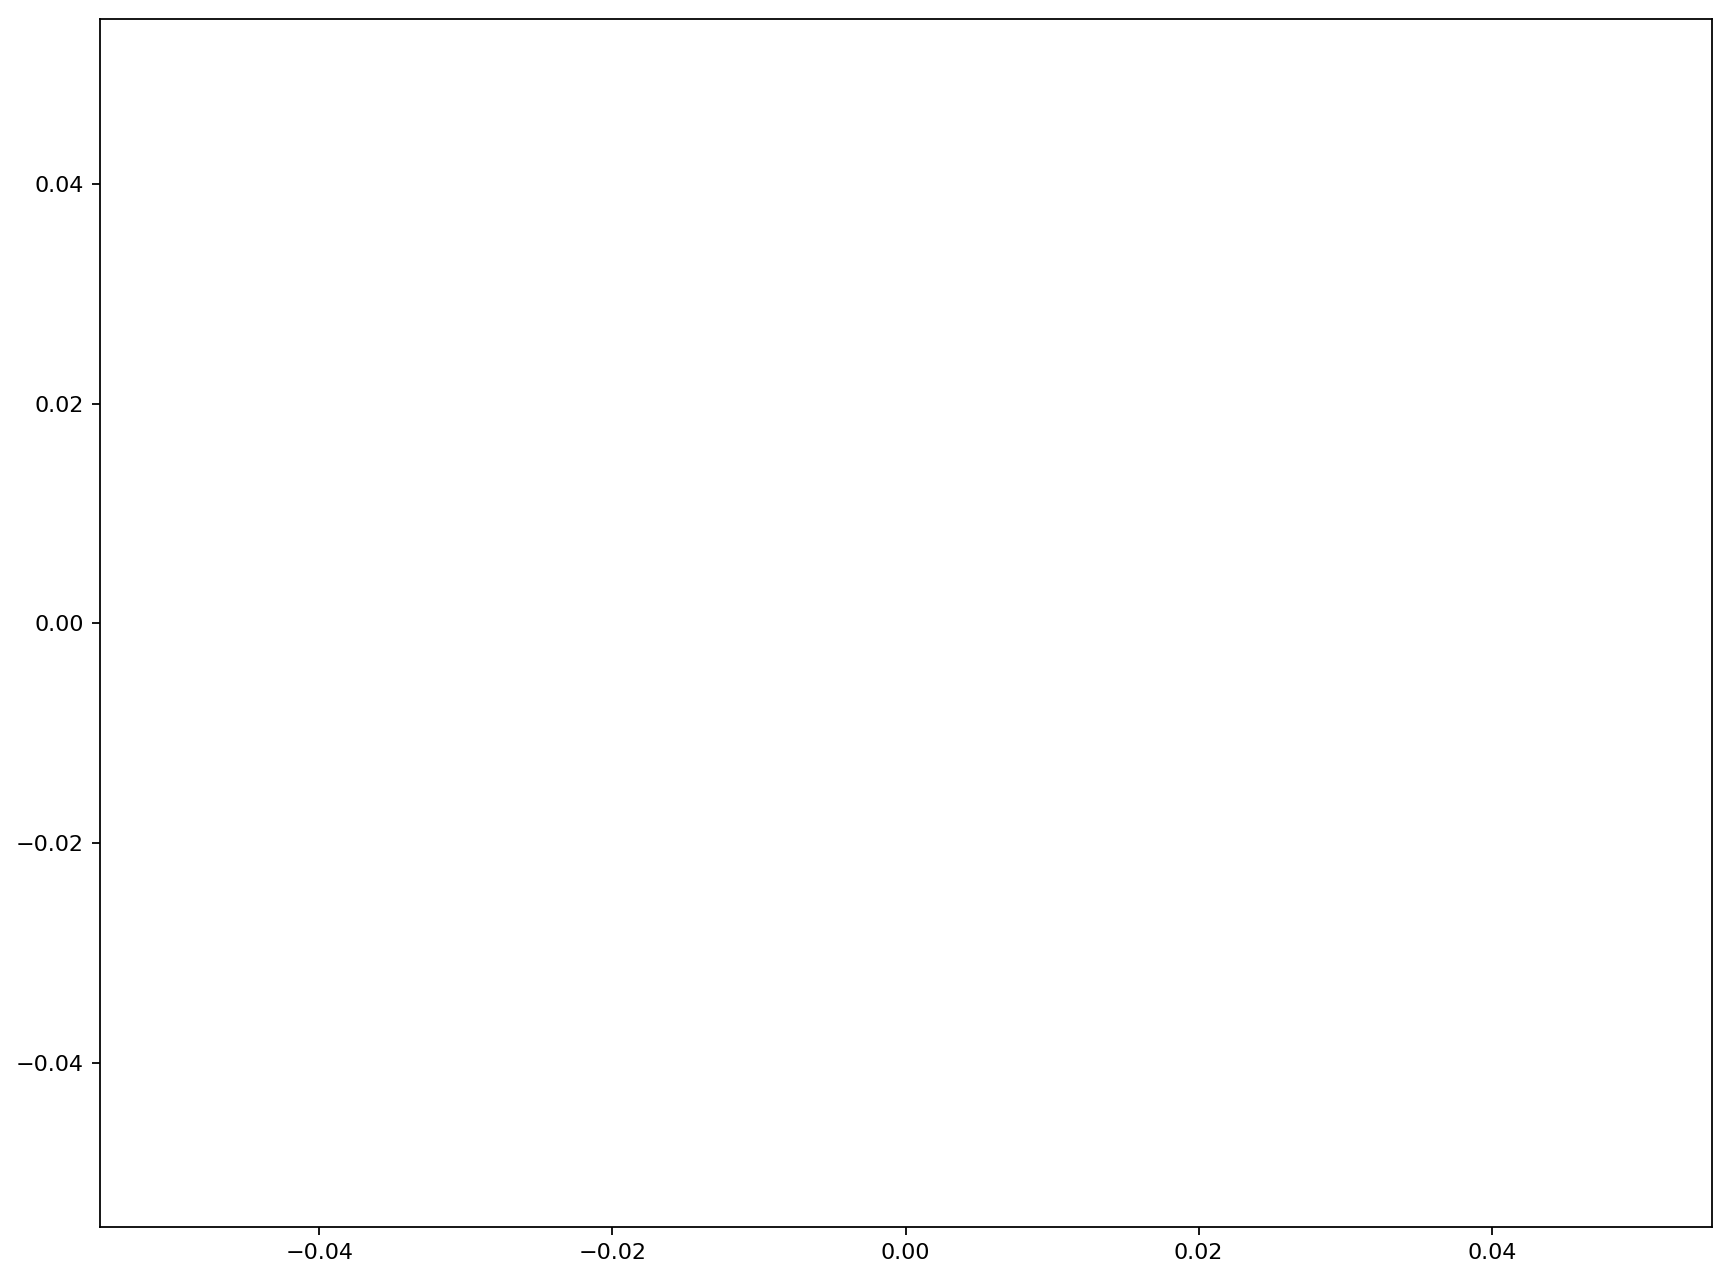

In [49]:
sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")
fig = figure(figsize=(13, 10), dpi=160, facecolor='w', edgecolor='k')   
#time = pandas.read_csv("/Users/hart-davis/Desktop/time.txt", sep="\t")

dom = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/time.txt", sep = "\t")
agulh = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Agulhas.txt", sep = "\t")
beng = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Benguela.txt", sep = "\t")
mada = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Madagascar.txt", sep = "\t")
retro = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Retro.txt", sep = "\t")
south = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/ARC_Average.txt", sep = "\t")

mean = agulh.Mean
dts = np.log10(1.25)
delta = np.arange(-1,30.2,dts)
l = []
dell = []
lambdaa = np.zeros(len(delta))
lambdastd = np.zeros(len(delta))
t = np.arange(0,len(delta))
for tt in range(0,40):
    alpha = delta[tt+1]/delta[tt]
    deltat=np.NaN*np.zeros(tt) #tt
    for d in range(0,40): #tt
        sep = agulh.Mean
        date = agulh.dateperhour
        t2 = np.where(sep>delta[tt+1])
        t2 = t2[0]
        t1 = np.where(sep<=delta[tt])
        t1 = t1[0]
        sep2 = sep[t2]
        sep1 = sep[t1]
        dada = date[t2]
        dada = dada.values
        da = date[t2+1]
        da = da.values
        factor = (sep2-sep1)/delta[tt+1]-delta[tt]
        deltat = (da[:len(factor)-1] - dada[:len(factor)-1])/factor[:len(factor)-1]
    
        I=np.where(np.isfinite(deltat))
        I = I[0]
        lambdaa = np.log(alpha)/np.mean(deltat[I])
    
        l.append(lambdaa)
        dell.append(delta)
        
plt.plot(l[:len(dell[0])],dell[0])    
plt.show()
    

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


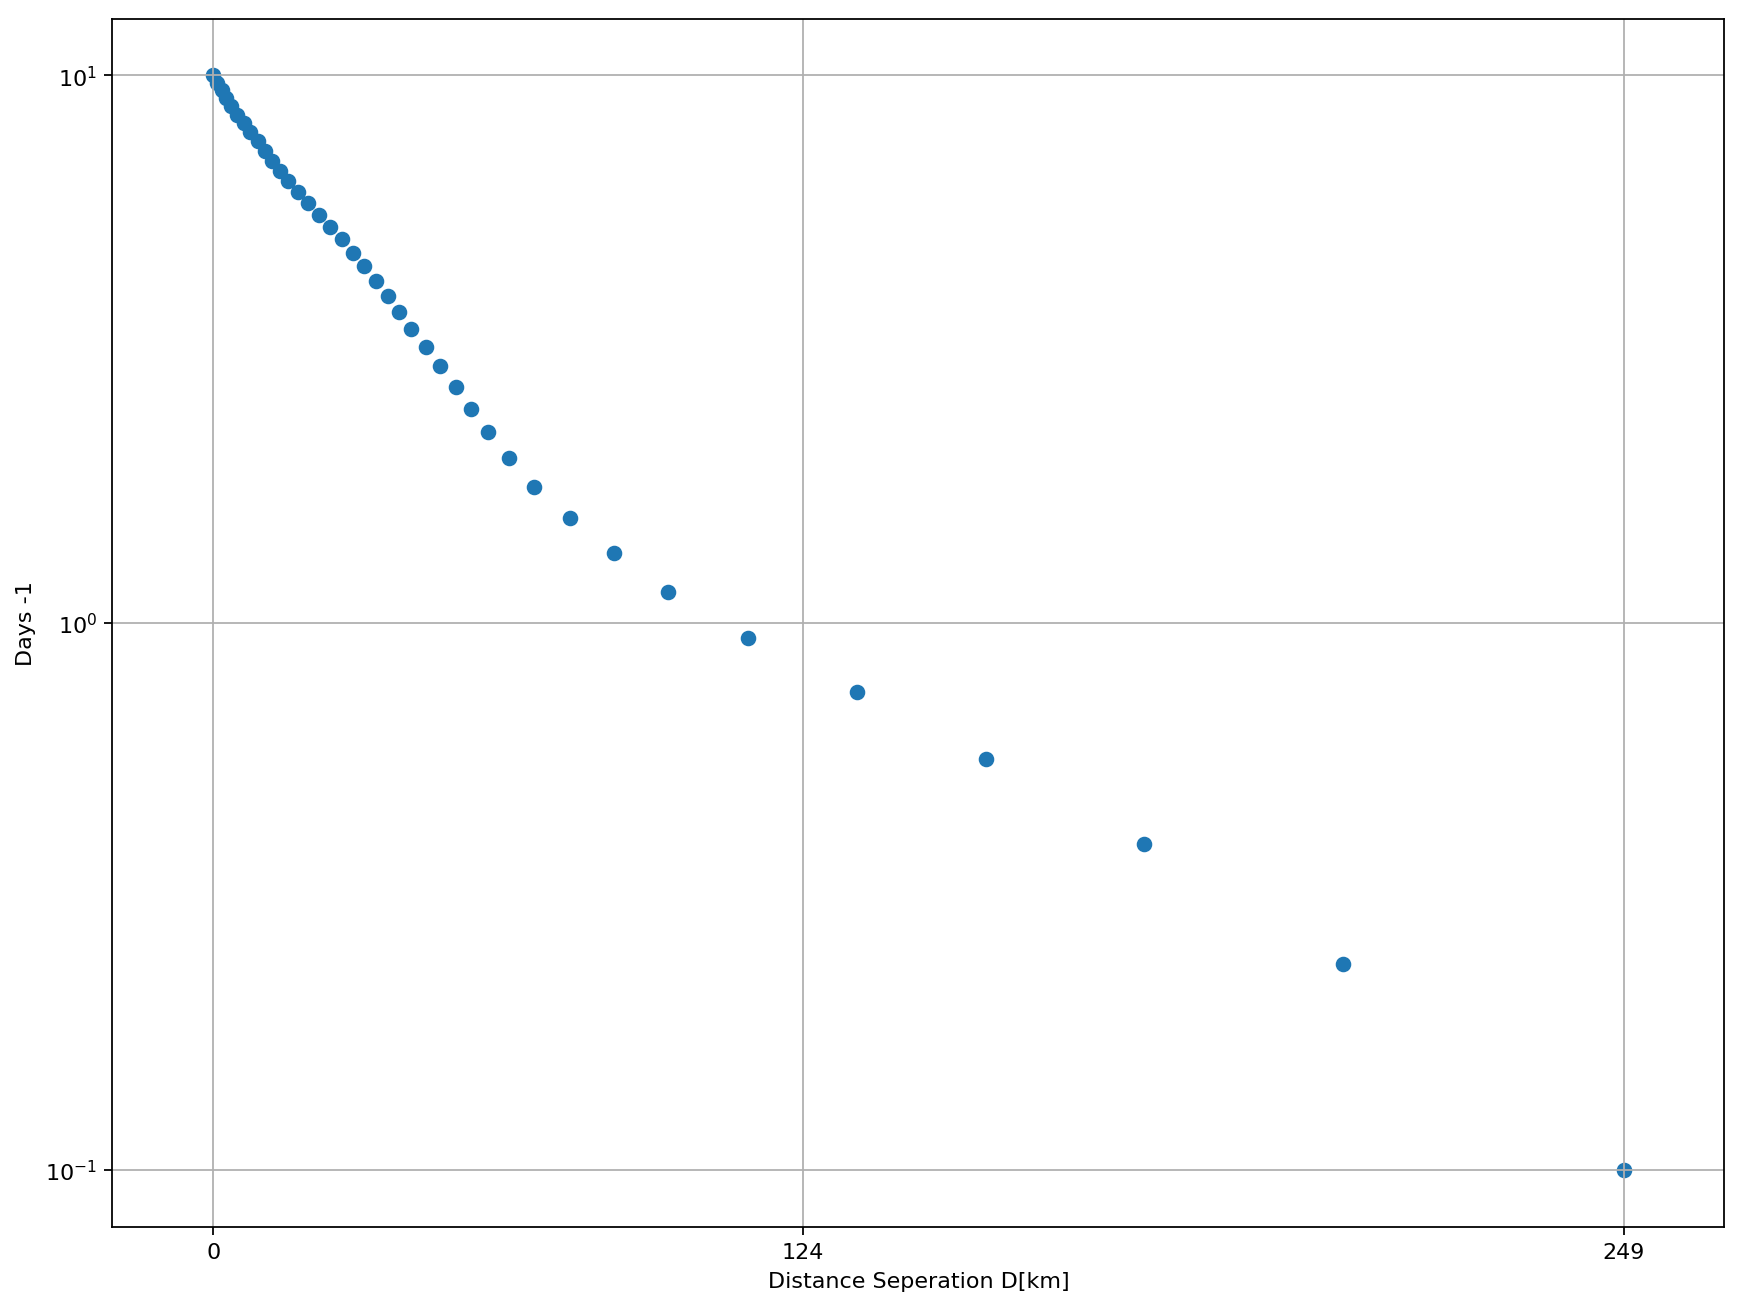

In [273]:
agulh = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Agulhas.txt", sep = "\t")
beng = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Benguela.txt", sep = "\t")
mada = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Madagascar.txt", sep = "\t")
retro = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Retro.txt", sep = "\t")
south = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Southern_test.txt", sep = "\t")
fig = figure(figsize=(13, 10), dpi=160, facecolor='w', edgecolor='k')   

mean = agulh.Mean

f = []
ti = []
ew = []

for a in range(0,41):
    r = (mean[a+1])/(mean[1])
    time = np.arange(0,len(mean),1)
    t = time[a+1] - time[1]
    if r > 1.:
        y = np.log(r)/(mean[1])/(t)
        f.append(y)
        ti.append(time[a])

plt.scatter(f,np.log10(time[1:len(f)+1]))
tea = np.log10(time[:len(f)+1])
#plt.ylim(0,1)
plt.xticks( [np.min(f),np.max(f)/2,np.max(f)], ("0", str(int(np.max(mean[:len(f)])/2)), str(int(np.max(mean[:len(f)])))))
plt.yticks( [0,tea.max()/2,tea.max()], ("$10^{-1}$", "$10^0$", "$10^1$"))
plt.xlabel("Distance Seperation D[km]")
plt.grid()
plt.ylabel("Days -1")
plt.show()

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


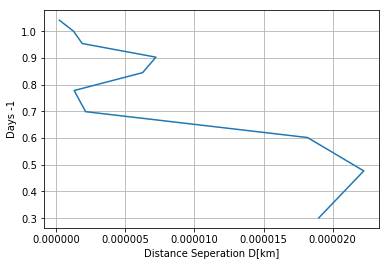

In [251]:
parcel = netCDF4.Dataset("/Users/hart-davis/Desktop/Scripts/Simulations/PARCEL_6436.nc")
lon1 = parcel.variables["lon"][0]
lat1 = parcel.variables["lat"][0]
f = []
ti = []
ew = []
d = []
for x in range(0,len(lon1)-1):
    dist1 = np.arccos(np.cos(np.radians(90-lat1[x]))*np.cos(np.radians(90-lat1[x+1]))+np.sin(np.radians(90-lat1[x]))*np.sin(np.radians(90-lat1[x+1]))*np.cos(np.radians(lon1[x]-lon1[x+1])))*6371*1000
    d.append(dist1)

for a in range(0,41):
    r = (d[a+1])/(d[1])
    time = np.arange(0,len(d),1)
    t = time[a+1] - time[1]
    if r >= 1.:
        y = np.log(r)/(d[1])/(t)
        f.append(y)
        ti.append(time[a])    
    
plt.plot(f,np.log10(time[1:len(f)+1]))
tea = np.log10(time[:len(f)+1])
#plt.ylim(0,1)
#plt.xticks( [np.min(f),np.max(f)/2,np.max(f)], ("0", str(int(np.max(mean[:len(f)])/2)), str(int(np.max(mean[:len(f)])))))
#plt.yticks( [0,tea.max()/2,tea.max()], ("$10^{-1}$", "$10^0$", "$10^1$"))
plt.xlabel("Distance Seperation D[km]")
plt.grid()
plt.ylabel("Days -1")
plt.show()    
    
    

In [304]:
drifterlati = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Agulhas/parcel_latitude.txt",sep="\t")
drifterloni = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Agulhas/parcel_longitude.txt",sep="\t")

lon1 = drifterloni.values
lat1 = drifterlati.values

f = []
ti = []
ew = []
d1 = []
for x in range(0,len(lon1)-1):
    dist1 = np.arccos(np.cos(np.radians(90-lat1[x]))*np.cos(np.radians(90-lat1[x+1]))+np.sin(np.radians(90-lat1[x]))*np.sin(np.radians(90-lat1[x+1]))*np.cos(np.radians(lon1[x]-lon1[x+1])))*6371*1000
    d1.extend(dist1)
    


/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning:

invalid value encountered in arccos



In [305]:
d = np.asarray(d1)
d2 = d/1000
d2

array([ 12.24497545,  10.04863595,   9.07122291, ...,   2.9366417 ,
         2.74083736,   2.72384168])

In [313]:
dd = np.where(d2<100)
ae = np.log10(d2[dd])
aw = np.sort(ae)
plt.hist(a,bins=30,color="blue")
plt.xticks(np.arange(np.min(aw),np.max(aw),0.5),("$10^{-2}$","$10^{-1}$", "$10^0$", "$10^1$","$10^2$", "$10^3$"))
plt.grid()
plt.show()

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in less

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log10



ValueError: range parameter must be finite.

In [307]:
dd = np.where(d2<25)
d1 = d2[dd]

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in less



/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in double_scalars



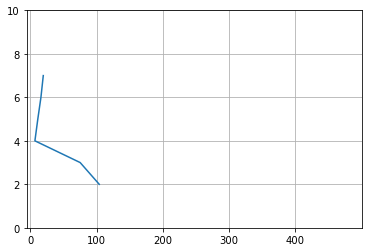

In [308]:
f = []
ti = []
ew = []

for a in range(0,41):
    r = (d1[a+1])/(d1[1])
    time = np.arange(0,len(d1),1)
    t = time[a+1] - time[1]
    if r >= 1:
        y = np.log(r)/(25)/(t)
        f.append(y)
        ti.append(time[a])
plt.plot(f,time[1:len(f)+1])
s = np.sort(f)
plt.xlim(-0.00005,0.005)
plt.ylim(0,len(time[0:len(f)])+3)
plt.xticks(np.arange(0,0.005,0.001),["0","100","200","300","400"])
plt.grid()
plt.show()

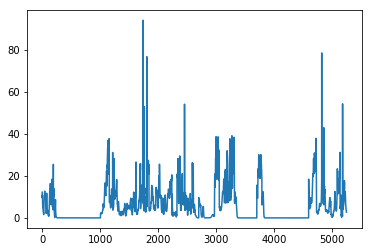

In [316]:
plt.plot(d2[dd])
plt.show()

In [73]:
f = []
ti = []
ew = []
for a in range(0,41):
    r = (d2[a+1])/(d2[1])
    time = np.arange(0,len(d2),1)
    t = time[a+1] - time[1]
    if r >= 1.:
        y = np.log(r)/(d2[1])/(t)
        f.append(y)
        ti.append(time[a])    
plt.plot(f,np.log10(time[1:len(f)+1]))

plt.show()

NameError: name 'd2' is not defined

In [133]:
sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")
fig = figure(figsize=(13, 10), dpi=160, facecolor='w', edgecolor='k')   
#time = pandas.read_csv("/Users/hart-davis/Desktop/time.txt", sep="\t")

dom = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/time.txt", sep = "\t")
agulh = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Agulhas.txt", sep = "\t")
beng = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Benguela.txt", sep = "\t")
mada = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Madagascar.txt", sep = "\t")
retro = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/Mean_Retro.txt", sep = "\t")
south = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Domains/Data/ARC_Average.txt", sep = "\t")

mean = agulh.Mean.values
t = np.arange(0,len(mean))
t = t*6
t[0] = 1
reldisp = []
for x in range(0, len(mean)):
    rd1 = np.square(mean[x])*t[x]
    reldisp.append(rd1)
reldisp[0]=1

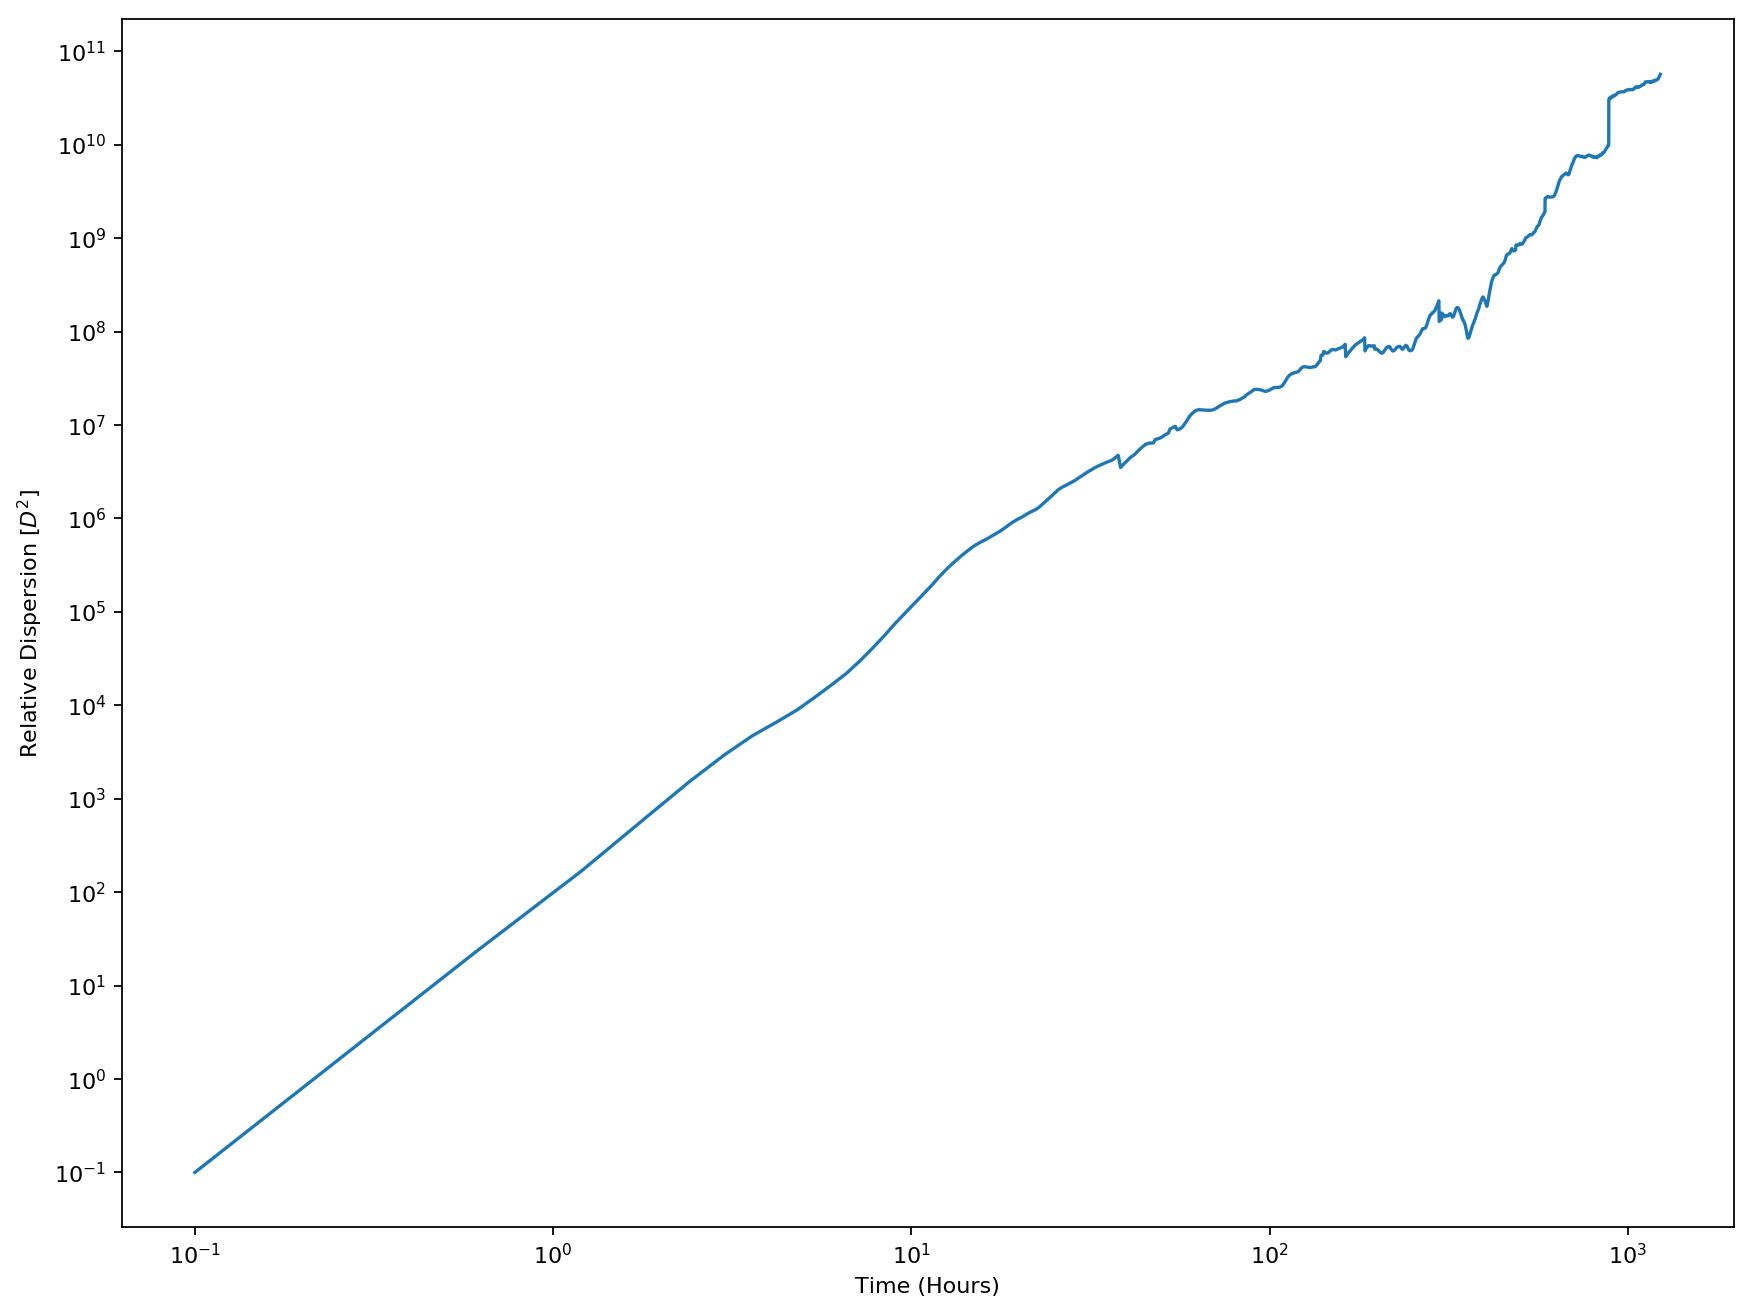

In [143]:
fig = figure(figsize=(13, 10), dpi=160, facecolor='w', edgecolor='k')   

plt.plot(np.log10(t),np.log10(reldisp))
#plt.ylim(0,12)
plt.xlabel("Time (Hours)")
plt.ylabel("Relative Dispersion [$D^{2}$]")
plt.xticks(np.arange(0,5,1),("$10^{-1}$","$10^0$","$10^1$","$10^2$","$10^3$"))
plt.yticks(np.arange(0,13,1), ("$10^{-1}$", "$10^0$", "$10^1$","$10^2$", "$10^3$","$10^4$", "$10^5$","$10^6$", "$10^7$","$10^8$","$10^9$","$10^{10}$","$10^{11}$"))
plt.show()

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log10


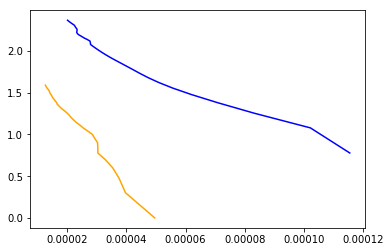

In [258]:
nc = netCDF4.Dataset("/Users/hart-davis/Desktop/Scripts/Simulations/PARCEL_6436.nc")
lon1 = nc.variables["lon"][0,:]
lat1 = nc.variables["lat"][0,:]
t1 = nc.variables["time"][0,:]
t = ((t1 - t1[0])/3600)
d1 = []
for x in range(0,len(lon1)-1):
    dist1 = np.arccos(np.cos(np.radians(90-lat1[x]))*np.cos(np.radians(90-lat1[x+1]))+np.sin(np.radians(90-lat1[x]))*np.sin(np.radians(90-lat1[x+1]))*np.cos(np.radians(lon1[x]-lon1[x+1])))*6371*1000
    d1.append(dist1)
d = np.cumsum(d1)
d[0] = 1

f = []
ti = []
ew = []
mean = d
for a in range(0,41):
    r = (mean[a+1])/(mean[1])
    time = np.arange(0,len(mean),1)
    tim = time[a+1] - time[1]
    if r > 1.:
        y = np.log(r)/(mean[1])/(tim)
        f.append(y)
        ti.append(time[a])

plt.plot(f,np.log10(t[:len(f)]),color="blue")

nc =  pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Simulations/Drifter_6436", sep="\t")
lon2 = nc.lon.values
lat2 = nc.lat.values
t1 = np.arange(0,len(lat1),1)
t = t1
d1 = []
for x in range(0,len(lon1)-1):
    dist1 = np.arccos(np.cos(np.radians(90-lat2[x]))*np.cos(np.radians(90-lat2[x+1]))+np.sin(np.radians(90-lat2[x]))*np.sin(np.radians(90-lat2[x+1]))*np.cos(np.radians(lon2[x]-lon2[x+1])))*6371*1000
    d1.append(dist1)
d = np.cumsum(d1)

f = []
ti = []
ew = []
mean = d
for a in range(0,41):
    r = (mean[a+1])/(mean[1])
    time = np.arange(0,len(mean),1)
    tim = time[a+1] - time[1]
    if r > 1.:
        y = np.log(r)/(mean[1])/(tim)
        f.append(y)
        ti.append(time[a])

plt.plot(f,np.log10(t[:len(f)]),color="orange")

plt.show()

In [257]:
d[0]

2114.1619554738309